In [40]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline
import os
import json

model = AutoModelForTokenClassification.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
tokenizer = AutoTokenizer.from_pretrained("lwachowiak/Metaphor-Detection-XLMR")
metaphor_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

def count_label_1(entities):
    count = 0
    for entity in entities:
        if entity['entity_group'] == 'LABEL_1':
            count += 1
    return count

def process_text_with_hugging_face(texts, filenames):
    metaphor_counts = {}
    for i, text in enumerate(texts):
        processed_text = metaphor_pipeline(text)
        print(f"Processing file with the model: {i}" )
        count = count_label_1(processed_text)
        file_name = filenames[i]
        metaphor_counts[file_name] = count
    return metaphor_counts

def load_data(folder_path):
    root_folder = folder_path

    filenames = []
    text_data = []

    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)
        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Loading file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            file_for_end = file_path.split('\\', n=2)
            filenames.append(file_for_end)
            text_data.append(text)

    return text_data, filenames

loaded_data, filenames = load_data('texts')

Loading file: defoe_crusoe.txt


TypeError: 'n' is an invalid keyword argument for split()

In [4]:
filenames

['texts\\18th_century\\defoe_crusoe',
 'texts\\18th_century\\fielding_tom_jones',
 'texts\\18th_century\\richardson_pamela',
 'texts\\18th_century\\swift_gulliver',
 'texts\\19th_century\\bronte_jane_eyre',
 'texts\\19th_century\\dickens_bleak_house',
 'texts\\19th_century\\eliot_middlemarch',
 'texts\\19th_century\\shelley_frankenstein',
 'texts\\20th_century\\conrad_heart',
 'texts\\20th_century\\hardy_jude',
 'texts\\20th_century\\lawrence_sons_and_lovers',
 'texts\\20th_century\\woolf_dalloway']

In [5]:
count_em_all = process_text_with_hugging_face(loaded_data, filenames)

Processing file with the model: 0
Processing file with the model: 1
Processing file with the model: 2
Processing file with the model: 3
Processing file with the model: 4
Processing file with the model: 5
Processing file with the model: 6
Processing file with the model: 7
Processing file with the model: 8
Processing file with the model: 9
Processing file with the model: 10
Processing file with the model: 11


In [38]:
df = pd.DataFrame.from_dict(count_em_all, orient='index')
df.head()
df.rename(columns={None: 'text', 0: 'metaphor_counts'}, inplace=True)
df.head()

,metaphor_counts
texts\18th_century\defoe_crusoe,53
texts\18th_century\fielding_tom_jones,47
texts\18th_century\richardson_pamela,39
texts\18th_century\swift_gulliver,30
texts\19th_century\bronte_jane_eyre,27


In [39]:
df.index = ['text']
df.index.name = 'text'

ValueError: Length mismatch: Expected axis has 12 elements, new values have 1 elements

<AxesSubplot:>

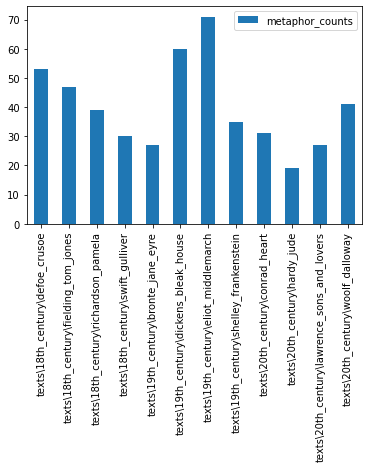

In [11]:
df.plot(kind='bar')